
# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.



In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

## Load the data

In [64]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

## See what type of object we loaded

In [65]:
type(diabetes)

sklearn.datasets.base.Bunch

## See what attributes the object has

In [66]:
dir(diabetes)

['data', 'target']

## See what type the data object is

In [67]:
type(diabetes.data)

numpy.ndarray

## See what its dimensions are

In [68]:
diabetes.data.shape

(442, 10)

## See what the dimensions the diabetes object has

In [69]:
diabetes.target.shape

(442,)

## List the first few rows of the data

In [70]:
diabetes.data[1:6,:]

array([[-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616]])

## List the first few rows of the target

In [71]:
diabetes.target[1:10]

array([  75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,  310.])

## Pick out column 2 (the third column - numbering starts at zero)

In [72]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
print(diabetes_X.shape)
diabetes_X[1:10]

(442, 1)


array([[-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215]])

## Split the data into training and test

In [73]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print(diabetes_X_train.shape)
print(diabetes_X_test.shape)

(422, 1)
(20, 1)


## Split the target the same way

In [74]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## Create a regression object

In [75]:
# Create linear regression object
regr = linear_model.LinearRegression()
type(regr)

sklearn.linear_model.base.LinearRegression

## List its attributes

In [76]:
dir(regr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'residues_',
 'score',
 'set_params']

## Train the model

In [77]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## List the coefficients

In [78]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 938.23786125]


## Predict y for a specific x

In [79]:
regr.predict(0.5)

array([ 622.03779245])

## compute the mean squared error and explained variance

In [80]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Mean squared error: 2548.07
Variance score: 0.47


## Plot the fitted line and test data

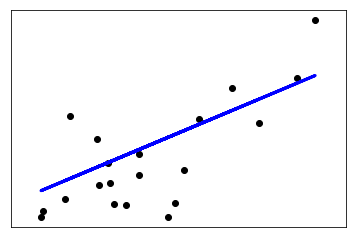

In [81]:

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercise:  Repeat process, using the fourth column of the data as the predictor

In [82]:

# 